<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/Spotify_Beyonce's_track_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyonce's Tracks Data Analysis
              
        dated: 4/4/2024

## Scope of the Project:
1. The focus of this Project is on providing a comprehensive view of Beyoncé's musical releases on Spotify, specifically tailored to showcase her creative output. To this end, the dataset includes tracks from the following album types:

    Albums: Full-length albums released by Beyoncé, encapsulating a range of her musical styles and eras.
    
    Singles: Standalone single releases, highlighting key songs that have been released independently of her full albums.
    
    It's important to note that this dataset deliberately excludes compilation albums. Compilations, which often contain a mixture of tracks from various artists or previously released tracks by Beyoncé, are not included to maintain a focus on her original releases and to provide a clearer picture of her artistic evolution.

# Importing import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset
beyonce_df = pd.read_csv('/content/beyonce_tracks.csv')

In [5]:
beyonce_df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


# Data preprocessing and Data cleaning

In [6]:
# check the shape of the dataset
beyonce_df.shape

(336, 20)

In [7]:
# first make a copy of the dataset
df = beyonce_df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

The release_date column is in object datatype. So Need to change it to datetime format

In [9]:
from datetime import datetime

In [10]:
df['release_date'] = pd.to_datetime(df.release_date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_name       336 non-null    object        
 1   track_name        336 non-null    object        
 2   album_name        336 non-null    object        
 3   is_explicit       336 non-null    bool          
 4   genres            336 non-null    object        
 5   release_date      336 non-null    datetime64[ns]
 6   track_id          336 non-null    object        
 7   danceability      336 non-null    float64       
 8   valence           336 non-null    float64       
 9   energy            336 non-null    float64       
 10  loudness          336 non-null    float64       
 11  acousticness      336 non-null    float64       
 12  instrumentalness  336 non-null    float64       
 13  liveness          336 non-null    float64       
 14  speechiness       336 non-

In [12]:
# check for null values
nv = df.isnull().sum()

In [13]:
nv

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
track_id            0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64

No null values in the dataset

In [14]:
# check for duplicate values
df.duplicated().sum()

0

No duplicate values

# Exploratory Data Analysis and Visualization

In [15]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'track_id', 'danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
# statistics summary of the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
release_date,336,2012-01-18 10:47:08.571428608,2002-06-17 00:00:00,2007-05-29 00:00:00,2009-07-21 00:00:00,2019-04-17 00:00:00,2024-02-10 00:00:00,NaN
danceability,336.0,0.61264,0.143,0.50875,0.635,0.72525,0.925,0.155603
valence,336.0,0.490362,0.0388,0.323,0.4895,0.651,0.971,0.233648
energy,336.0,0.682492,0.0452,0.55775,0.715,0.82175,0.993,0.18909
loudness,336.0,-7.28972,-27.432,-8.451,-6.7505,-5.44675,-2.706,2.854806
acousticness,336.0,0.138767,0.000066,0.005295,0.0372,0.158,0.994,0.219504
instrumentalness,336.0,0.079687,0.0,0.0,0.00002,0.00551,0.937,0.209146
liveness,336.0,0.305424,0.0162,0.0972,0.201,0.39275,0.983,0.265685
speechiness,336.0,0.168143,0.0271,0.05365,0.1065,0.25475,0.94,0.150844
key,336.0,5.181548,0.0,1.0,6.0,8.0,11.0,3.568488


# What are the most common genres associated with Beyoncé's music?

In [17]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [19]:
df.genres.nunique()

1

In [21]:
df.genres.unique()

array(['pop, r&b'], dtype=object)

Beyonce is associated with Pop and RnB music genere

In [25]:
a = df.groupby('danceability')['energy'].sum().reset_index()

In [26]:
a

,danceability,energy
0,0.143,0.315
1,0.195,0.326
2,0.201,0.409
3,0.238,0.435
4,0.242,0.438
...,...,...
239,0.884,0.747
240,0.896,0.621
241,0.903,0.519
242,0.911,0.512


# What is the distribution of danceability scores for Beyonce's tracks?

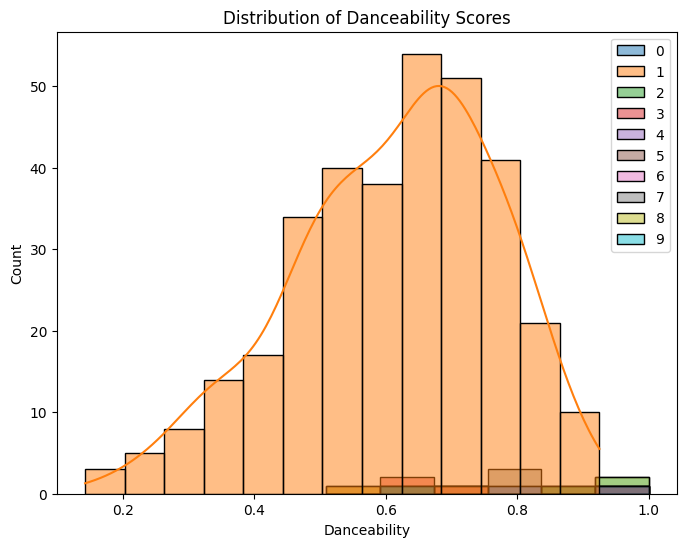

In [82]:
# creating a visualization to understand the distribution of danceability
plt.figure(figsize=(8,6))
current_palette = sns.color_palette()
sns.histplot(sns.color_palette("pastel", 10))
sns.histplot(df['danceability'], kde=True)
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title("Distribution of Danceability Scores")
plt.show()

In [44]:
# checking skewness
df.danceability.skew()

-0.4613910804180383

Observation:
    The skewness value of -0.4613910804180383 indicates that the distribution of danceability scores for Beyonce's tracks is slightly negatively skewed.
1. It can be considered a moderate negative skew not an extreme one.
2. The negative skewness suggests that here are more tracks with lower danceability scores than tracks with higher danceability scores.
3. It implies that Beyonce's tracks lean more towards lower danceability scores

<Axes: >

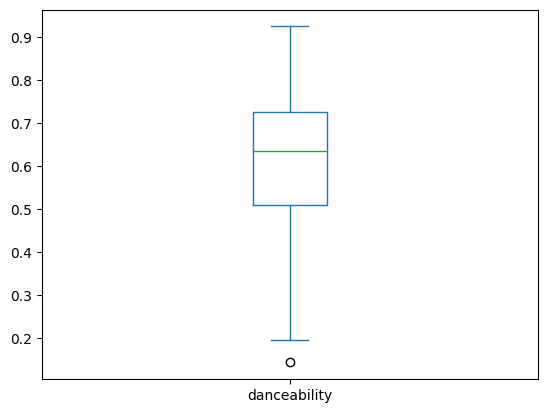

In [42]:
df.danceability.plot(kind = 'box')

There are not much outlier in danceability

In [46]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'track_id', 'danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

# How does the energy of Beyonce's tracks vary across top 10 album?

In [47]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [76]:
# Let's groupby album with energy
energy_by_album = df.groupby('album_name')['energy'].mean().reset_index()
energy_by_album = energy_by_album.sort_values(by='energy', ascending=False)
energy_by_album.head()

,album_name,energy
20,Green Light Freemasons EP,0.934250
10,Beautiful Liar (Freemasons Remix Edit),0.908000
8,BREAK MY SOUL REMIXES,0.890250
30,Irreplaceable (remixes),0.868143
12,Check On It (Remix 5 Pak) (feat. Bun B & Slim ...,0.857400


In [81]:
energy_by_album.tail()

,album_name,energy
0,16 CARRIAGES,0.453000
4,At Last,0.438000
16,Dangerously In Love,0.430229
47,The Star Spangled Banner - Super Bowl XXXVIII ...,0.326000
19,Fever,0.261000


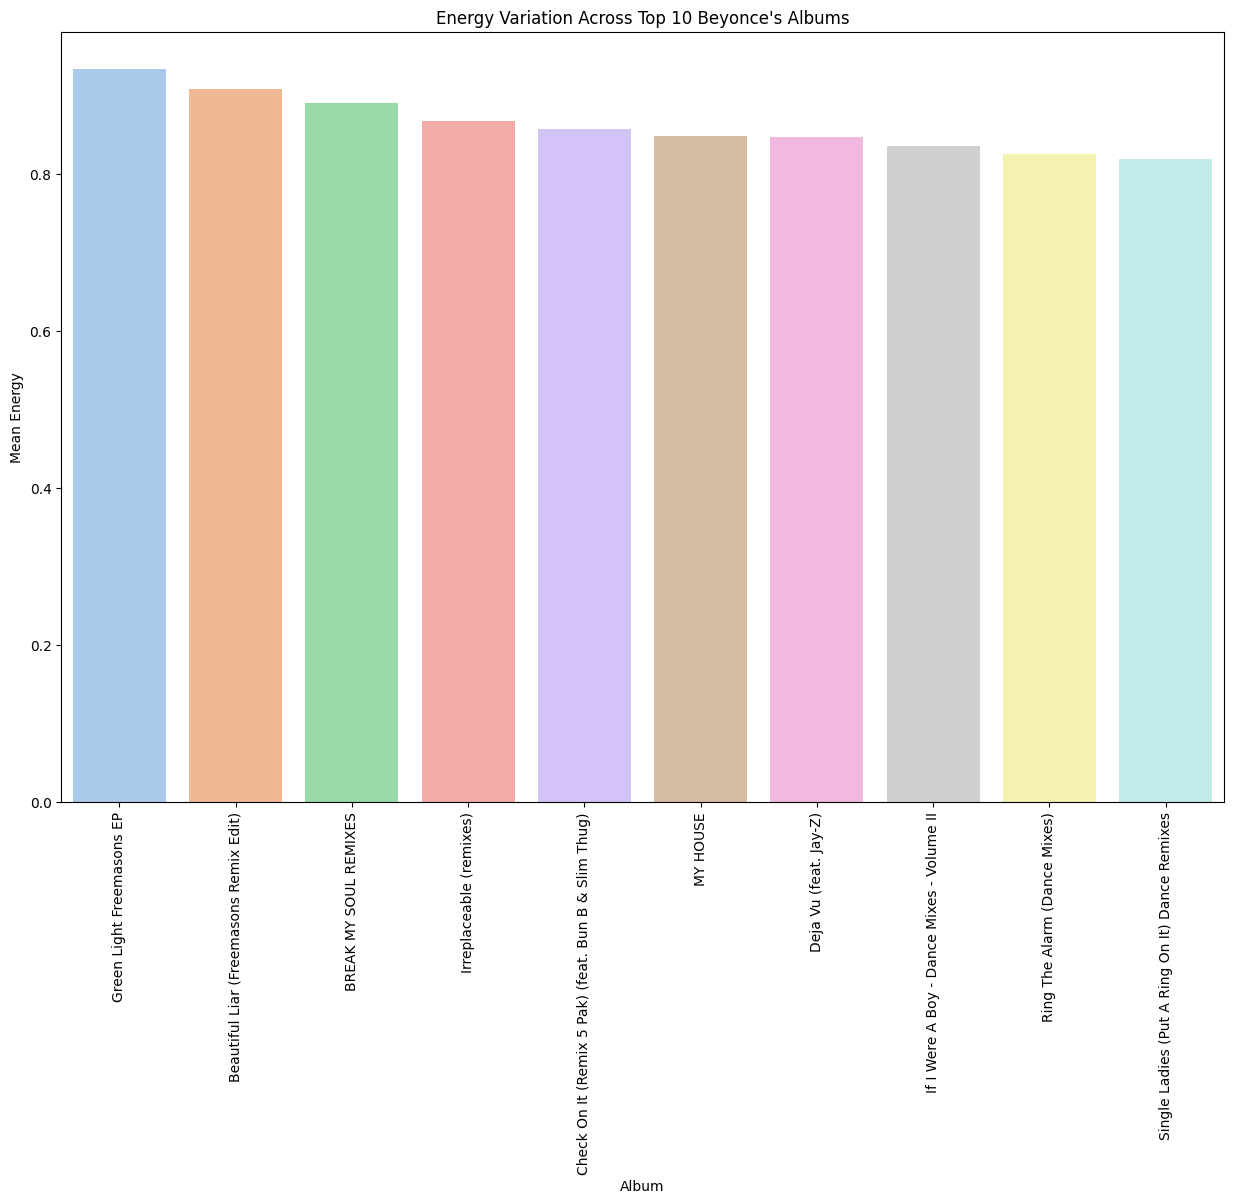

In [83]:
top_10 = energy_by_album.head(10)

# Plot the mean energy for each album
plt.figure(figsize=(15, 10))
sns.barplot(x='album_name', y='energy', data= top_10, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Album')
plt.ylabel('Mean Energy')
plt.title("Energy Variation Across Top 10 Beyonce's Albums")
plt.show()

## Observation:
1. The album "Green Light Freemasons EP" has the highest mean energy as compare to others.
2. The album "Fever" has the lowest mean energry compare to other albums.

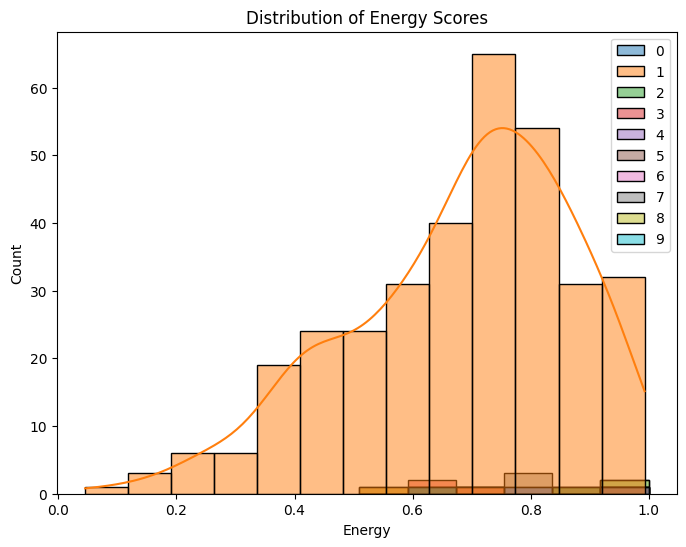

In [92]:
# creating a visualization to understand the distribution of energy
plt.figure(figsize=(8,6))
current_palette = sns.color_palette()
sns.histplot(sns.color_palette("pastel", 10))
sns.histplot(df['energy'], kde=True)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title("Distribution of Energy Scores")
plt.show()


In [84]:
df.energy.skew()

-0.6564896281869635

Observation:
    The skewness value of -0.6564896281869635 indicates that the distribution of energy for Beyonce's tracks is slightly negatively skewed.
1. It can be considered a moderate negative skew not an extreme one.
2. The negative skewness suggests that here are more tracks with lower energy scores.
3. It implies that Beyonce's tracks lean more towards lower energy scores.

In [93]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'track_id', 'danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

# How is the Valance or music positiveness related to the Energy of the tracks?

In [98]:
# Let's groupby valance with energy
val_by_energy = df.groupby('valence')['energy'].sum().reset_index()
val_by_energy = val_by_energy.sort_values(by='energy', ascending=False)
val_by_energy.head()

,valence,energy
34,0.184,3.588
48,0.217,2.470
77,0.353,2.136
177,0.598,1.965
157,0.551,1.895


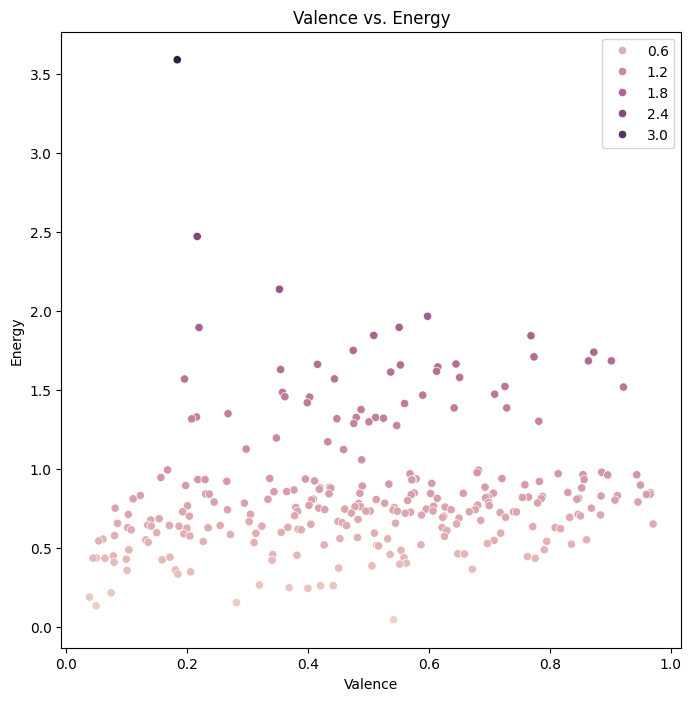

In [111]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='valence', y='energy', hue = 'energy', data= val_by_energy)
plt.title('Valence vs. Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend()
plt.show()

Valence score measures the musical positiveness of a track, ranging from 0.0 (sad, negative) to 1.0 (happy, positive). The energy score, which is a measure of the intensity and activity of a track, ranging from 0.0 (low energy) to 1.0 (high energy).

Observation:
  1. Most of the tracks are concentrated in the lower-left quadrant, indicating that most of the songs have low valence i.e. those songs are sad and also have low energy scores.

  2. There are a few tracks with high energy scores (above 0.8), but their valence scores are spread across a wider range, from low to high.

  3. There are a few outliers with very high valence scores (above 0.8) and moderate to high energy scores.
    
  4. The overall distribution of points suggests a positive correlation between energy and valence, meaning that tracks with higher energy tend to have higher valence (more positive or happier) scores, and vice versa. However, the correlation is not extremely strong, as there are still many points deviating from a perfect linear relationship.


# How has the danceability of Beyonce's tracks evolved over time?


In [113]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


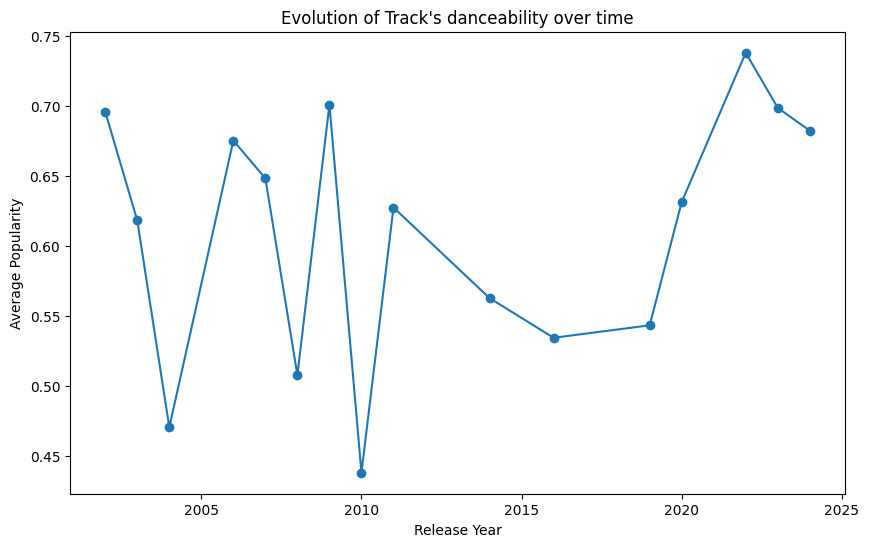

In [125]:
# Plot the trend of track danceability over time
plt.figure(figsize=(10, 6))
df.groupby(df['release_date'].dt.year)['danceability'].mean().plot(kind='line', marker='o')
plt.title("Evolution of Track's danceability over time")
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# How has the energy of Beyonce's tracks evolved over time?

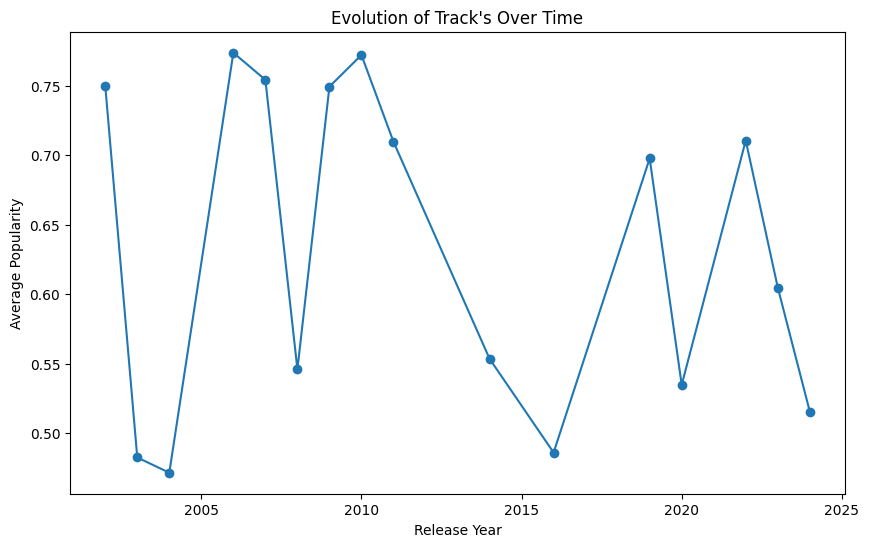

In [124]:
plt.figure(figsize=(10, 6))
df.groupby(df['release_date'].dt.year)['energy'].mean().plot(kind='line', marker='o')
plt.title("Evolution of Track's Over Time")
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

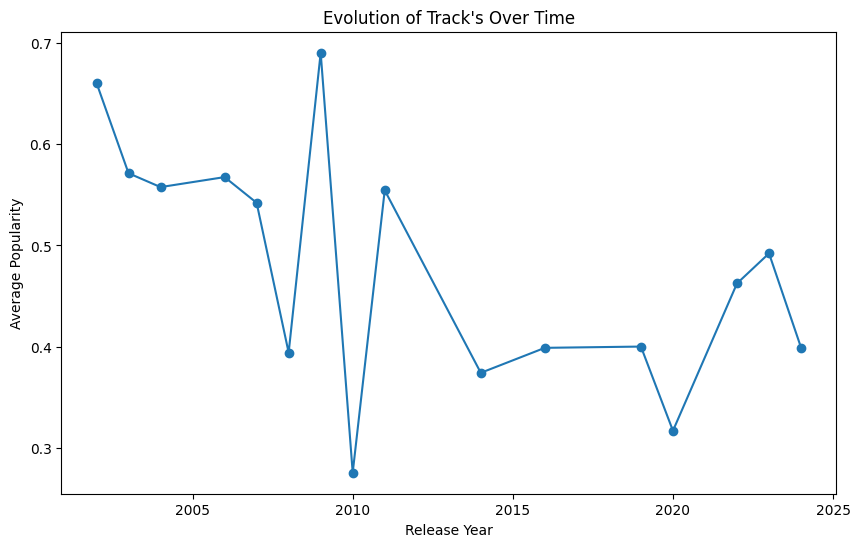

In [126]:
plt.figure(figsize=(10, 6))
df.groupby(df['release_date'].dt.year)[['danceability', 'energy', 'valence']].mean().plot(kind='line', marker='o')
plt.title("Evolution of Track's Over Time")
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# How the danceability energy and valence varies over time?

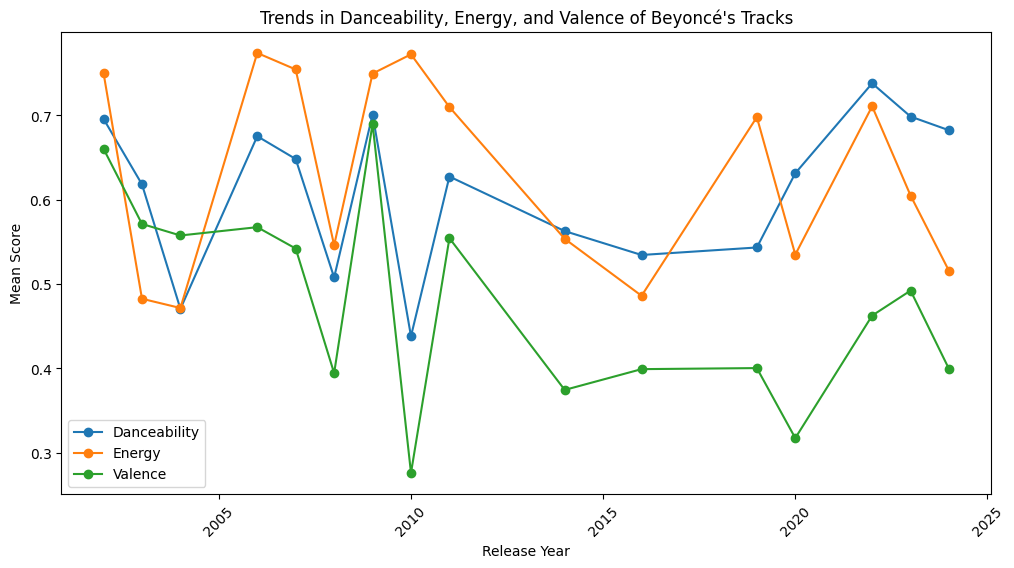

In [130]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))
trends = df.groupby(df['release_date'].dt.year)[['danceability', 'energy', 'valence']].mean().reset_index()

# Plot the trends
ax.plot(trends['release_date'], trends['danceability'], marker='o', label='Danceability')
ax.plot(trends['release_date'], trends['energy'], marker='o', label='Energy')
ax.plot(trends['release_date'], trends['valence'], marker='o', label='Valence')

# Set labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Mean Score')
ax.set_title('Trends in Danceability, Energy, and Valence of Beyonces Tracks')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Find the correlation between numerical features like danceability, valence, energy, loudness, acousticness, instrumentalness, liveness, speechiness, tempo, and duration.

In [131]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'track_id', 'danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

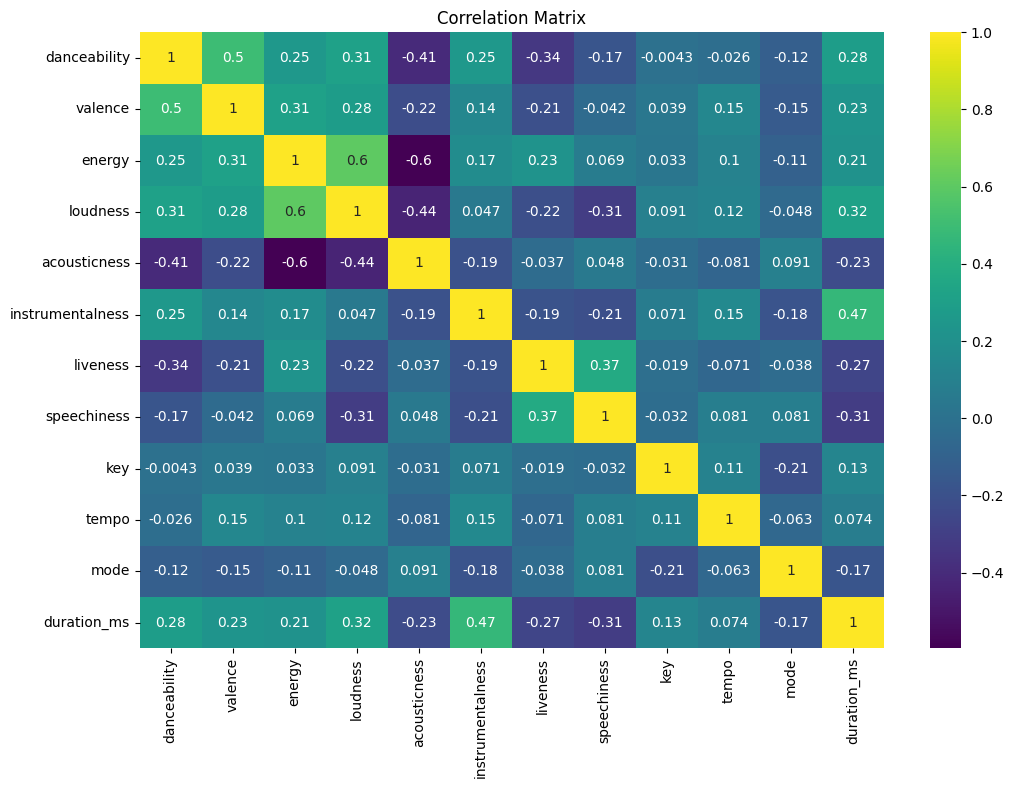

In [133]:
# Calculate the pearson correlation matrix
corr_matrix = df[['danceability', 'valence', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'key', 'tempo', 'mode', 'duration_ms']].corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

observation:
1. Danceability vs. Other Features: Danceability has a moderate positive correlation with energy (0.25) and valence (0.5), suggesting that more danceable tracks tend to be more energetic and have a more positive musical mood. It has a weak negative correlation with loudness (-0.31) and acousticness (-0.41), indicating that danceable tracks are generally louder and less acoustic.

2. Valence vs. Other Features: Valence (musical positiveness) has a moderate positive correlation with energy (0.31) and danceability (0.5), confirming the relationship between positive mood, energy, and danceability. It has a weak negative correlation with acousticness (-0.22) and liveness (-0.21), suggesting that more positive tracks are less acoustic and have less live audience presence.

3. Energy vs. Other Features: Energy has a moderate positive correlation with danceability (0.25) and valence (0.31), as mentioned earlier. It also has a weak positive correlation with loudness (0.6) and speechiness (0.31), indicating that more energetic tracks tend to be louder and have more spoken words.

# Trend Analysis in Beyonce's Musical Evolution

In [135]:
# Group the data by release year and count the number of tracks
tracks_by_year = df.groupby(df['release_date'].dt.year)['track_name'].count().reset_index()

In [137]:
tracks_by_year.head()

,release_date,track_name
0,2002,4
1,2003,17
2,2004,4
3,2006,41
4,2007,46


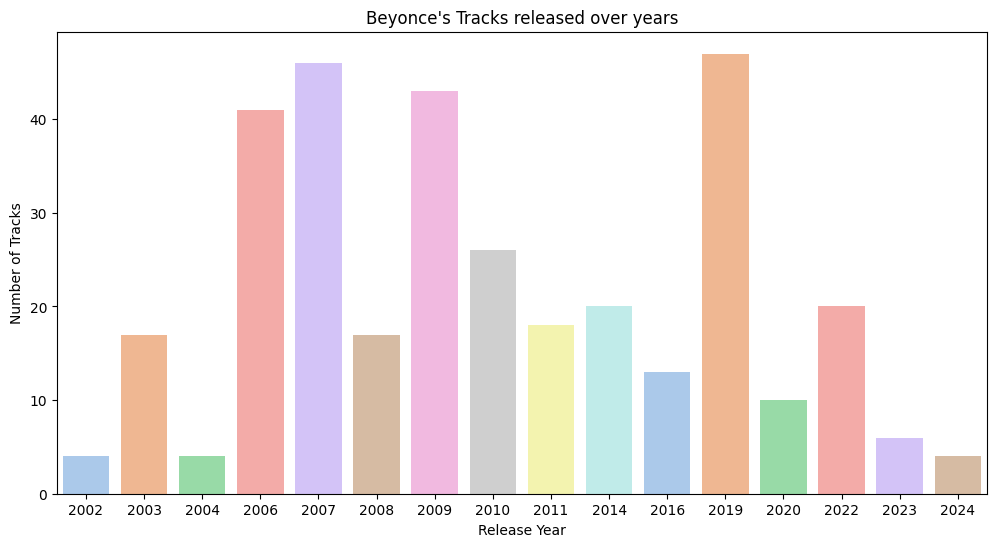

In [141]:
# Plot the number of tracks released each year
plt.figure(figsize=(12, 6))
sns.barplot(data = tracks_by_year, x = 'release_date', y = 'track_name', palette = 'pastel')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.title("Beyonce's Tracks released over years")
plt.show()

In [ ]:
# Analyzing the evolution of musical elements over time
df['year'] = data['release_date'].dt.year
for feature in ['danceability', 'valence', 'energy']:
    plt.figure(figsize=(12, 6))
    df.groupby('year')[feature].mean().plot(kind='line', marker='o')
    plt.xlabel('Release Year')
    plt.ylabel(feature.capitalize())
    plt.title(f'Evolution of {feature.capitalize()} in Beyonce's Music')
    plt.show()

In [142]:
# Analyzing the evolution of musical elements over time
df['year'] = df.release_date.dt.year

In [143]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,...,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,year
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,...,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4,2022
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,...,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5,2022
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,...,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4,2022
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,...,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4,2022
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,...,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4,2022


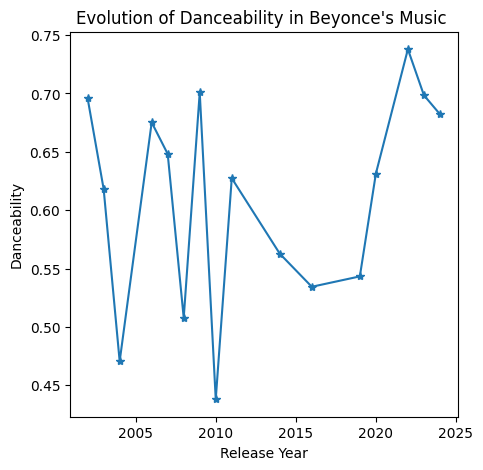

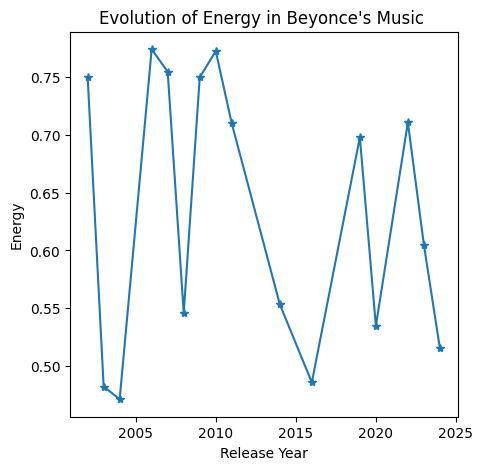

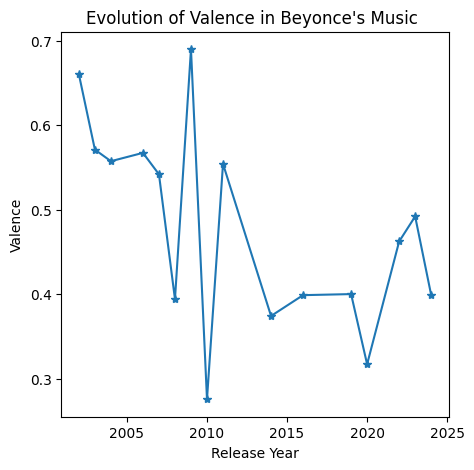

In [148]:
for i in ['danceability','energy', 'valence']:
  plt.figure(figsize = (5,5))
  df.groupby('year')[i].mean().plot(kind = 'line', marker = '*')
  plt.xlabel('Release Year')
  plt.ylabel(i.capitalize())
  plt.title(f"Evolution of {i.capitalize()} in Beyonce's Music ")
  plt.show()

# Mood and Musical Elements in Beyonce's Tracks

In [150]:
# Create a new column Mood based on Valence
df['mood']=  df.valence.apply(lambda x: 'Positive' if x > 0.5 else 'Negative')


In [151]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,...,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,year,mood
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,...,0.000013,0.1240,0.1860,5,105.865,0,208014,4,2022,Negative
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,...,0.004680,0.1550,0.1020,7,149.147,1,210372,5,2022,Negative
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,...,0.000066,0.1710,0.0998,10,121.892,0,215460,4,2022,Negative
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,...,0.000010,0.0698,0.1410,7,115.042,1,225389,4,2022,Positive
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,...,0.000106,0.1550,0.2600,1,114.991,1,116727,4,2022,Positive


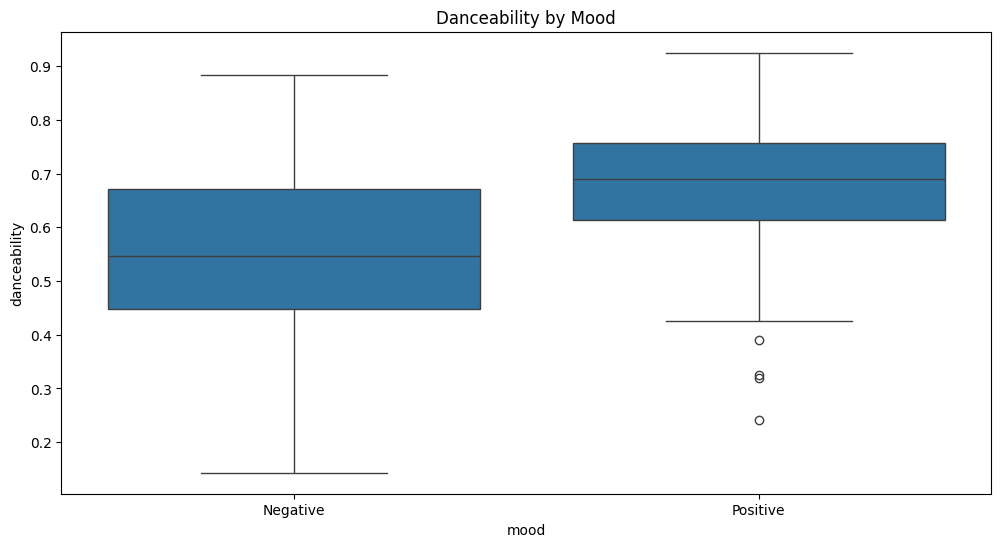

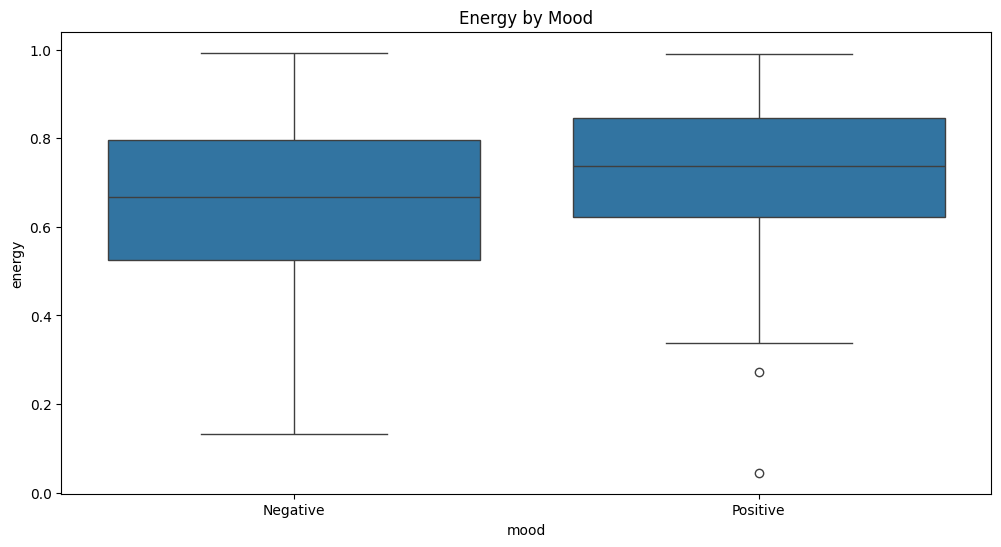

In [155]:
# analyzing the mood with other musical elements
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'mood', y= 'danceability', data = df)
plt.title('Danceability by Mood')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='mood', y='energy', data=df)
plt.title('Energy by Mood')
plt.show()

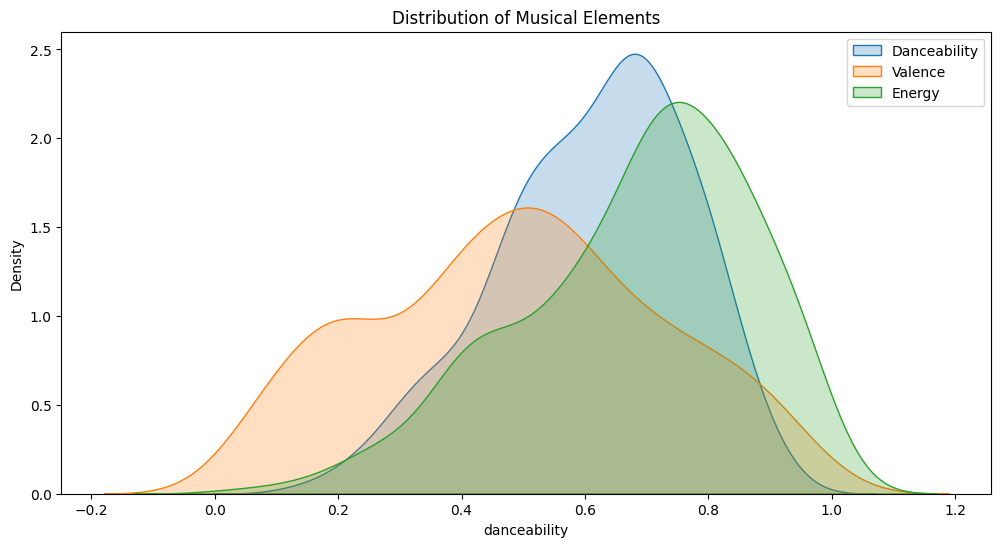

In [156]:
# Analyze the distribution of musical elements
plt.figure(figsize=(12, 6))
sns.kdeplot(df['danceability'], shade=True, label='Danceability')
sns.kdeplot(df['valence'], shade=True, label='Valence')
sns.kdeplot(df['energy'], shade=True, label='Energy')
plt.title('Distribution of Musical Elements')
plt.legend()
plt.show()

In conclusion, the analysis reveals strong interconnections between musical elements like danceability, energy, valence, loudness, and acousticness in Beyonce's tracks. These relationships provide insights into the underlying patterns and characteristics of her music, which can be valuable for understanding her artistic expression, identifying trends, and potentially developing recommendation systems or other data-driven applications related to her music.